# Explore here

In [19]:
# Your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

import warnings

from sklearn.preprocessing import StandardScaler

import os
import joblib

In [20]:
print("----(1). IMPORTO EL DATASET----")
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
df.head(2)

----(1). IMPORTO EL DATASET----


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [21]:
print("----(2). ELIMINO ATRIBUTOS Y SOLO DEJO LOS QUE PIDEN EN EL EJERCICIO----")
df = df.drop(columns=['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal'])
df.head(2)

----(2). ELIMINO ATRIBUTOS Y SOLO DEJO LOS QUE PIDEN EN EL EJERCICIO----


,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22


In [22]:
print("----(3). DIVIDO EL DATASET EN TRAIN Y TEST Y ESCALO----")
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Imprimir las primeras filas del conjunto de entrenamiento escalado
print(pd.DataFrame(X_train_scaled, columns=['Latitude', 'Longitude', 'MedInc']).head())


----(3). DIVIDO EL DATASET EN TRAIN Y TEST Y ESCALO----
   Latitude  Longitude    MedInc
0 -0.326196  -1.372811  1.272587
1 -0.035843  -0.876696  0.709162
2  0.144701  -0.460146 -0.447603
3 -1.017864  -1.382172  1.232698
4 -0.171488   0.532084 -0.108551


----(4). APLICO EL MODELO K-MEANS, ENTRENO Y GRAFICO LOS CLUSTERS----


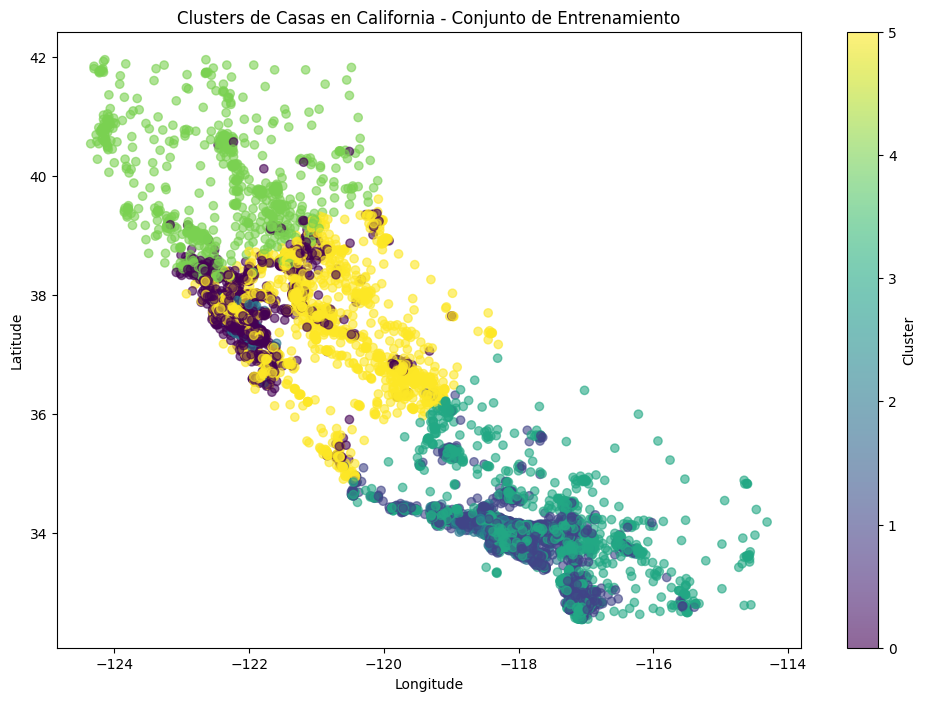

In [23]:
print("----(4). APLICO EL MODELO K-MEANS, ENTRENO Y GRAFICO LOS CLUSTERS----")

kmeans = KMeans(n_clusters=6, random_state=42)
X_train_clusters = kmeans.fit_predict(X_train_scaled)

# Añadir el cluster al conjunto de datos de entrenamiento
X_train['cluster'] = X_train_clusters

# Graficar los clusters
plt.figure(figsize=(12, 8))
plt.scatter(X_train['Longitude'], X_train['Latitude'], c=X_train['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de Casas en California - Conjunto de Entrenamiento')
plt.show()


----(5). PREDIGO EN CONJUNTO DEL TEST----


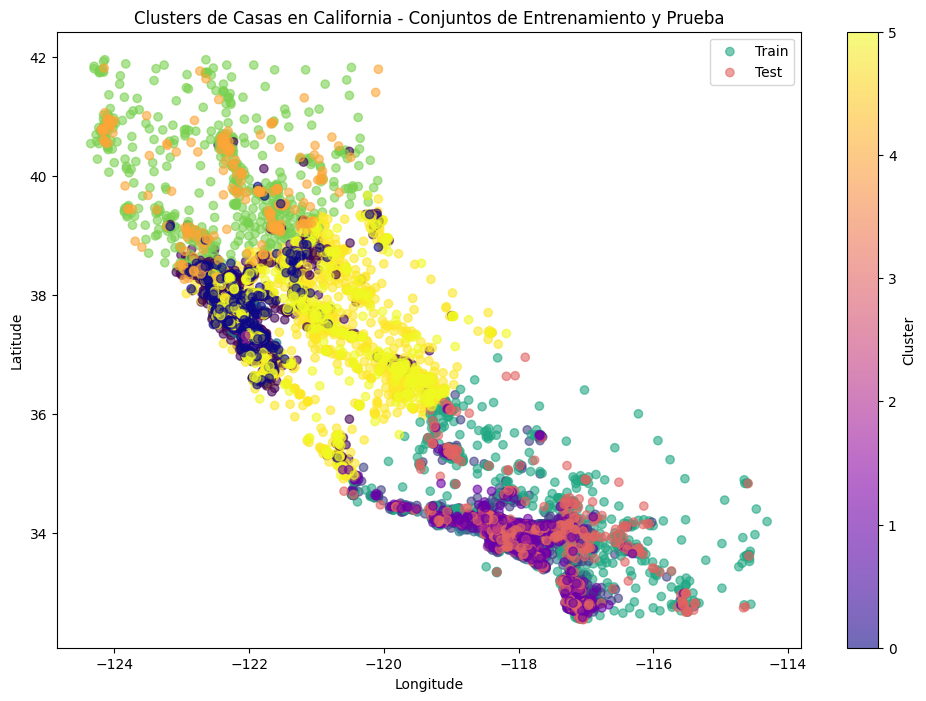

In [24]:
print("----(5). PREDIGO EN CONJUNTO DEL TEST----")
# Predecir con el conjunto de test
X_test_clusters = kmeans.predict(X_test_scaled)

# Añadir el cluster al conjunto de datos de prueba
X_test['cluster'] = X_test_clusters

# Graficar los clusters incluyendo el conjunto de test
plt.figure(figsize=(12, 8))
plt.scatter(X_train['Longitude'], X_train['Latitude'], c=X_train['cluster'], cmap='viridis', alpha=0.6, label='Train')
plt.scatter(X_test['Longitude'], X_test['Latitude'], c=X_test['cluster'], cmap='plasma', alpha=0.6, label='Test')
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de Casas en California - Conjuntos de Entrenamiento y Prueba')
plt.legend()
plt.show()


In [25]:
print("----(6). ENTRENO EL MODELO RANDOMFOREST----")


# Entrenar el modelo de clasificación supervisada
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, X_train_clusters)

# Predicción con el conjunto de test
y_pred_clusters = rf.predict(X_test_scaled)

# Obtener las estadísticas del modelo
print("Reporte de Clasificación:")
print(classification_report(X_test['cluster'], y_pred_clusters))

print("Matriz de Confusión:")
print(confusion_matrix(X_test['cluster'], y_pred_clusters))


----(6). ENTRENO EL MODELO RANDOMFOREST----
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       557
           1       1.00      1.00      1.00       897
           2       1.00      0.98      0.99       116
           3       1.00      1.00      1.00      1397
           4       0.98      0.98      0.98       246
           5       0.99      0.99      0.99       915

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128

Matriz de Confusión:
[[ 555    0    0    0    2    0]
 [   0  895    0    1    0    1]
 [   1    1  114    0    0    0]
 [   0    2    0 1395    0    0]
 [   0    0    0    0  242    4]
 [   6    0    0    1    3  905]]


In [27]:
print("----(7). GUARDO AMBOS MODELOS----")


# Definir las rutas donde se guardarán los modelos
ruta_K_means = '/workspaces/Proyecto-K-Medias-Jorge3127/models/modelo_k_means.pkl'
ruta_rf = '/workspaces/Proyecto-K-Medias-Jorge3127/models/modelo_rf.pkl'

# Verificar si el directorio existe, si no, crearlo
directorio = os.path.dirname(ruta_K_means)
if not os.path.exists(directorio):
    os.makedirs(directorio)

# Guardar el modelo KMeans
joblib.dump(kmeans, ruta_K_means)
print(f"El Modelo K-Means guardado en: {ruta_K_means}")

# Guardar el modelo Random Forest
joblib.dump(rf, ruta_rf)
print(f"El Modelo Random Forest guardado en: {ruta_rf}")


----(7). GUARDO AMBOS MODELOS----
El Modelo K-Means guardado en: /workspaces/Proyecto-K-Medias-Jorge3127/models/modelo_k_means.pkl
El Modelo Random Forest guardado en: /workspaces/Proyecto-K-Medias-Jorge3127/models/modelo_rf.pkl
